# Uber Rider Data Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [5]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [6]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

## Explore data

### Numeric variables

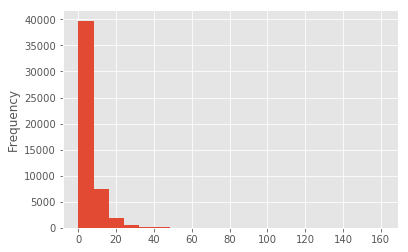

In [7]:
df['avg_dist'].plot.hist(bins=20)

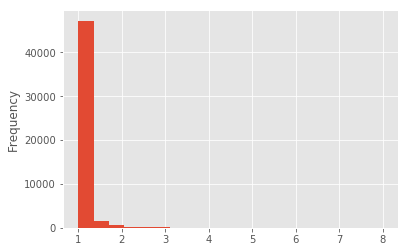

In [8]:
df['avg_surge'].plot.hist(bins=20)

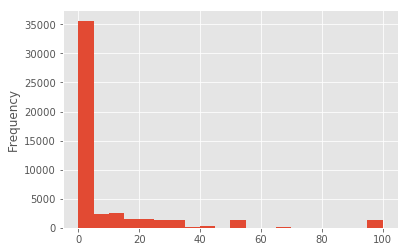

In [9]:
df['surge_pct'].plot.hist(bins=20)

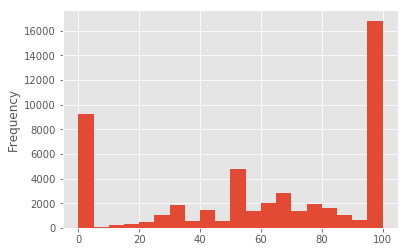

In [10]:
df['weekday_pct'].plot.hist(bins=20)

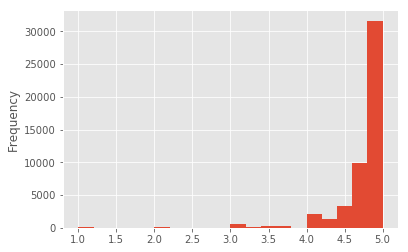

In [11]:
df['avg_rating_by_driver'].plot.hist(bins=20)

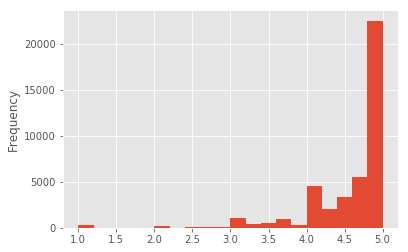

In [12]:
df['avg_rating_of_driver'].plot.hist(bins=20)

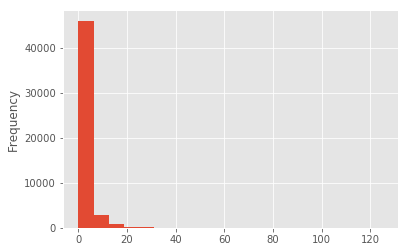

In [13]:
df['trips_in_first_30_days'].plot.hist(bins=20)

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


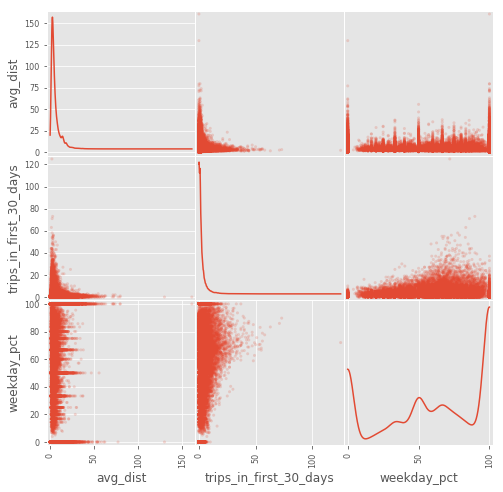

In [14]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[[u'avg_dist', u'trips_in_first_30_days', u'weekday_pct']], 
               alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

### Categorical variables

In [15]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

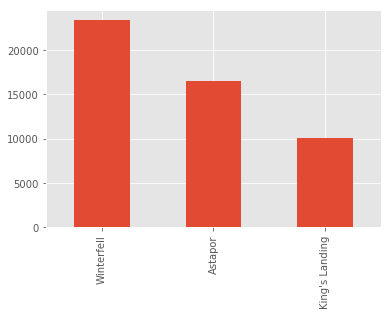

In [16]:
df['city'].value_counts().plot.bar()

In [17]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

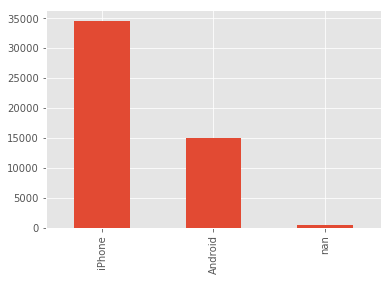

In [18]:
df['phone'].value_counts(dropna=False).plot.bar()

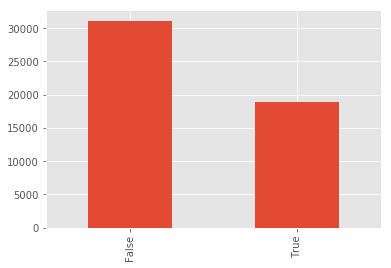

In [19]:
df['luxury_car_user'].value_counts().plot.bar()

## Clean data - dealing with missing values

In [20]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

In [24]:
df_fillna = df.copy()
df_fillna['phone'] = df['phone'].fillna('no_phone')
df_fillna['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())
df_fillna['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

In [29]:
df = df_fillna

## Transform data

### Time-series variables

In [30]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [31]:
# construct a new df to experiment on the time-series 
df_timestamp = df[['last_trip_date', 'signup_date']].copy()

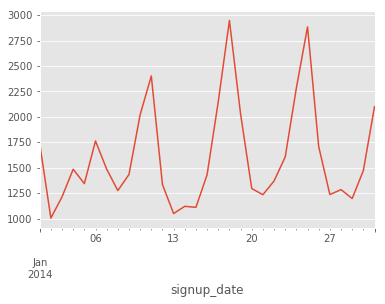

In [33]:
df_timestamp['count'] = 1
df_timestamp = df_timestamp.set_index('signup_date')
df_timestamp['count'].resample("1D").sum().plot()

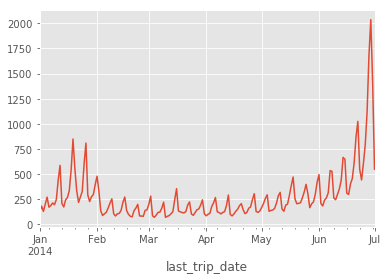

In [34]:
df_timestamp = df_timestamp.set_index('last_trip_date')
df_timestamp['count'].resample("1D").sum().plot()

Counts of last trip date significantly increse. The reason could be that a lot of people use Uber just for travel during summer vaccation, when travel ends, they are not going to use Uber any more because they have cars in their own cities/countries.

In [36]:
# There might be some signal from day of week when a user signed up Uber
df['signup_dow'] = df['signup_date'].apply(lambda x: x.dayofweek)

In [37]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Converting categorical variables

Categorical variables:
* city
* phone
* luxury_car_user
* signup_dow

In [39]:
df['luxury_car_user'] = df['luxury_car_user'].astype(int)
col_category = ['signup_dow', 'city', 'phone']
df_dummies = pd.get_dummies(df[col_category], columns=col_category)
df = df.join(df_dummies)

## Define a label/target/outcome

Add churn indicator. Considered to churn if have not taken a trip in the last 30 days. 

In [48]:
# Define churn: users did not take a trip during last 30 days, i.e. last trip date is earlier than 2014-06-01
df['churn'] = (df.last_trip_date < pd.to_datetime('2014-06-01')) * 1
df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')) * 1

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,1,0,0,1,0,0,1,0,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0,0,1,0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,0,1,0,0,0,1,0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,0,0,1,0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,0,0,0,1,1,0,0,1,0


In [49]:
df['churn'].mean()

0.62392000000000003

In [50]:
df['active'].mean()

0.37608000000000003

## EDA with label

### colored scatter_matrix

In [51]:
colors = ['red' if ix else 'blue' for ix in df['active']]

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


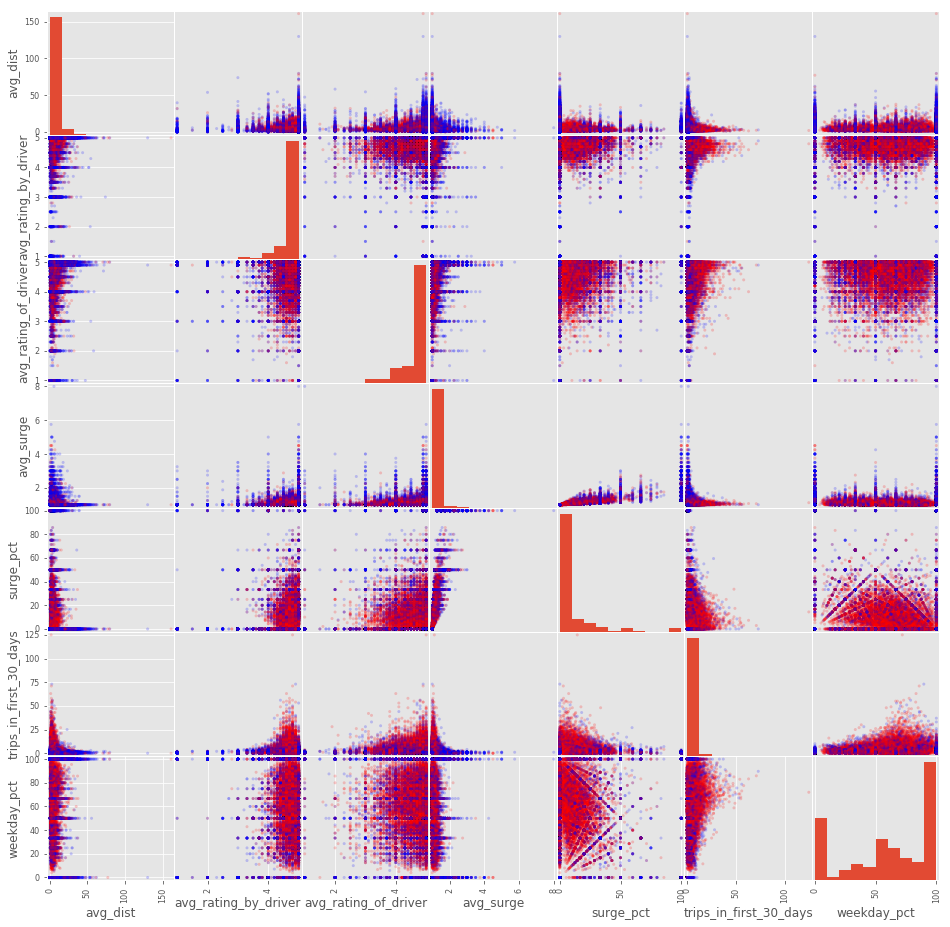

In [52]:
scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', 
                  u'avg_surge', u'surge_pct', u'trips_in_first_30_days', u'weekday_pct']],
              alpha=0.2, figsize=(16, 16), diagonal='hist', c=colors)
plt.show()

### Explore churn rate split by features 

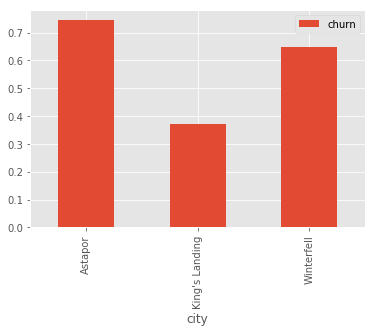

In [53]:
df[['city', 'churn']].groupby(['city']).mean().plot.bar()

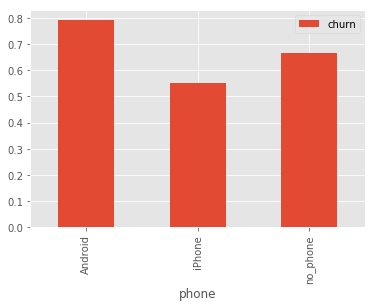

In [54]:
df[['phone', 'churn']].groupby(['phone']).mean().plot.bar()

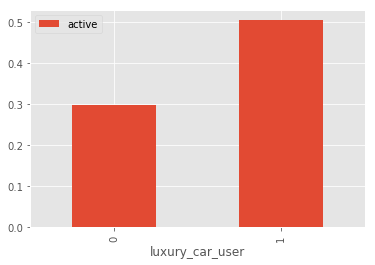

In [55]:
df[['luxury_car_user', 'active']].groupby(['luxury_car_user']).mean().plot.bar()

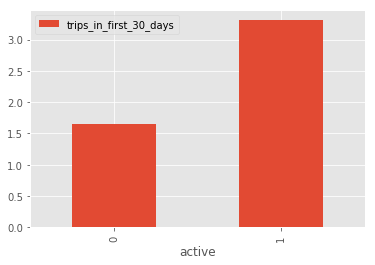

In [56]:
df[['trips_in_first_30_days', 'active']].groupby(['active']).mean().plot.bar()

In [57]:
is_active = df['active'] == 1
is_active

0         True
1        False
2        False
3         True
4        False
5         True
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13        True
14       False
15       False
16        True
17        True
18        True
19        True
20       False
21       False
22       False
23        True
24       False
25       False
26       False
27       False
28        True
29       False
         ...  
49970    False
49971     True
49972     True
49973     True
49974    False
49975     True
49976     True
49977    False
49978    False
49979    False
49980    False
49981    False
49982    False
49983    False
49984    False
49985    False
49986    False
49987    False
49988     True
49989    False
49990    False
49991     True
49992    False
49993     True
49994    False
49995     True
49996    False
49997    False
49998    False
49999    False
Name: active, Length: 50000, dtype: bool

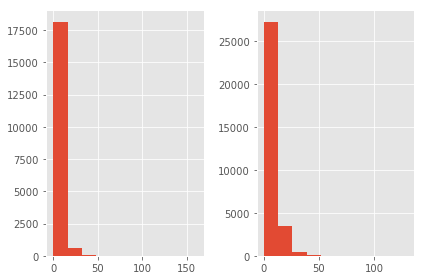

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df[is_active]['avg_dist'].values)
axes[1].hist(df[~is_active]['avg_dist'].values)
fig.tight_layout()
plt.show()

In [59]:
def hist_active_vs_churn(df, col_name):
    is_active = df['active'] == 1
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df[is_active][col_name].values)
    axes[0].set_title("active users")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    axes[1].hist(df[~is_active][col_name].values)
    axes[1].set_title("churned users")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    fig.tight_layout()
    plt.show()

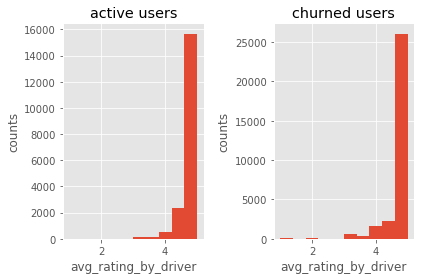

In [61]:
hist_active_vs_churn(df, col_name=u'avg_rating_by_driver')

In [62]:
cols = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge']

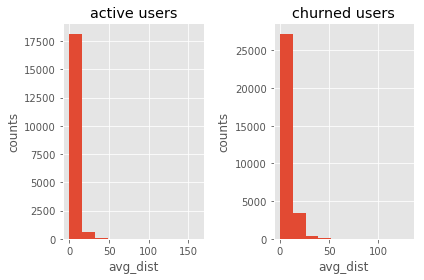

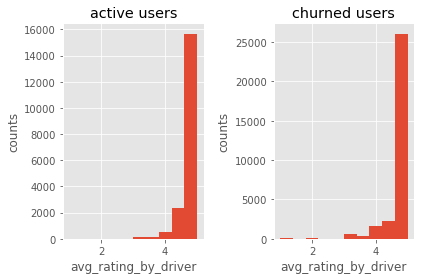

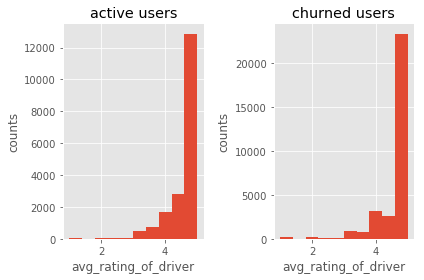

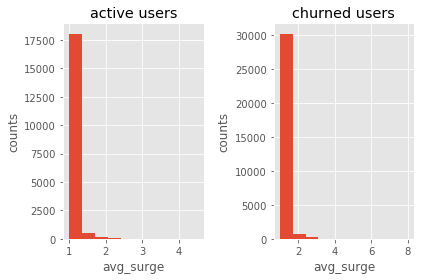

In [63]:
for col in cols:
    hist_active_vs_churn(df, col_name=col)

## Save cleaned data to csv file

### Select which columns to be saved

In [64]:
selected_columns = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone', u'signup_dow_0', 
                     u'signup_dow_1', u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', 
                     u'signup_dow_5', u'signup_dow_6', u'churn']

### Save to csv file


In [65]:
cleaned_data_csv = 'data/cleaned_data.csv'
df[selected_columns].to_csv(cleaned_data_csv, index=False)